<a href="https://colab.research.google.com/github/FREYDER18/PARCIAL-2025-1/blob/main/SOLUCION_PUNTO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**punto 4**

Sea $x′′(t)$ la segunda derivada de la señal $x(t)$, donde $t$ $∈$ $[ti, tf]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$
c_{n}=\frac{1}{(ti-tf)n^{2}w_{o}^{2}}\int_{t_i}^{t_f}x^{''}(t)e^{-jnw_{o}t}dt;\quad n\in\mathbb{Z}
$$
¿Cómo se pueden calcular los coeficientes an y bn desde $x′′(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.
 desarrollos con Sympy.

- Codigo punto 4.

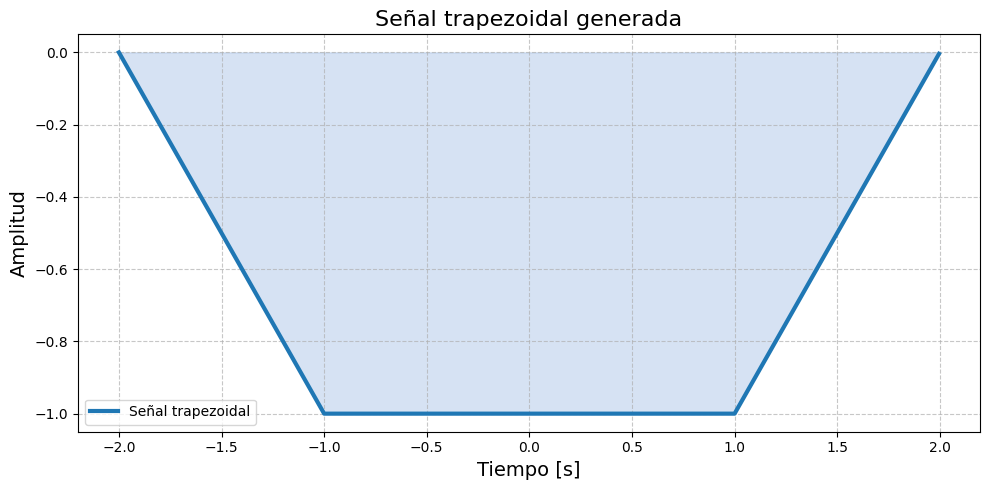

In [7]:
# Importación de librerías necesarias
from ipywidgets import interact, IntSlider  # Para crear controles interactivos (aunque no se usa aquí)
import numpy as np                         # Para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt            # Para graficar

# Parámetros de la señal trapezoidal
A = 1       # Amplitud de la señal (definido pero no usado explícitamente para escalar)
d2 = 2      # Extremo derecho del trapecio (final rampa descendente)
d1 = 1      # Límite de la parte plana (meseta) del trapecio

# Cálculo del período total de la señal
T = 2 * d2         # El período va desde -d2 hasta d2, así que es el doble de d2
Fo = 1 / T         # Frecuencia fundamental (inversa del período)
Fs = 1000 * Fo     # Frecuencia de muestreo muy alta para buena resolución

# Vector de tiempo para evaluar y graficar la señal: desde -T/2 hasta T/2 en pasos de 1/Fs
tv = np.arange(-T/2, T/2, 1/Fs)

# Número total de puntos en el vector de tiempo
Nm = len(tv)

# Definición de la función trapezoidal parametrizada usando operaciones vectorizadas
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una forma trapezoidal con los puntos clave a,b,c,d.

    Parámetros:
    x : array de tiempos donde se evalúa la función
    a : inicio de la rampa ascendente
    b : inicio de la meseta (parte plana)
    c : final de la meseta
    d : final de la rampa descendente

    Retorna un array con valores entre 0 y 1 con forma trapezoidal.
    """
    rampa_asc = (x - a) / (b - a)  # rampa ascendente normalizada (0 a 1)
    rampa_desc = (d - x) / (d - c) # rampa descendente normalizada (1 a 0)
    # Combina y limita los valores para que estén entre 0 y 1
    return np.maximum(0, np.minimum(rampa_asc, np.minimum(1, rampa_desc)))

# Evaluar la señal trapezoidal en el vector de tiempo usando los puntos definidos
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)  # Se invierte la señal para que sea negativa

# Graficar la señal trapezoidal resultante con colores mejorados y estilo limpio
plt.figure(figsize=(10, 5))
plt.plot(tv, x, color='#1f77b4', linewidth=3, label='Señal trapezoidal')  # Azul estándar de matplotlib
plt.fill_between(tv, x, color='#aec7e8', alpha=0.5)  # Relleno suave azul claro para mejorar visibilidad
plt.grid(True, linestyle='--', alpha=0.7)            # Cuadrícula punteada y ligera
plt.xlabel("Tiempo [s]", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.title("Señal trapezoidal generada", fontsize=16)
plt.legend()
plt.tight_layout()  # Mejor ajuste de márgenes
plt.show()


OBJETIVO

Generar una señal trapezoidal parametrizada en función del tiempo:

Definir una señal periódica con forma trapezoidal que pueda ajustarse mediante parámetros para el inicio y fin de sus rampas y meseta.

<ipython-input-3-99feb58481b3>:27: RuntimeWarning: invalid value encountered in divide
  Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi * 2 * nv * 3)


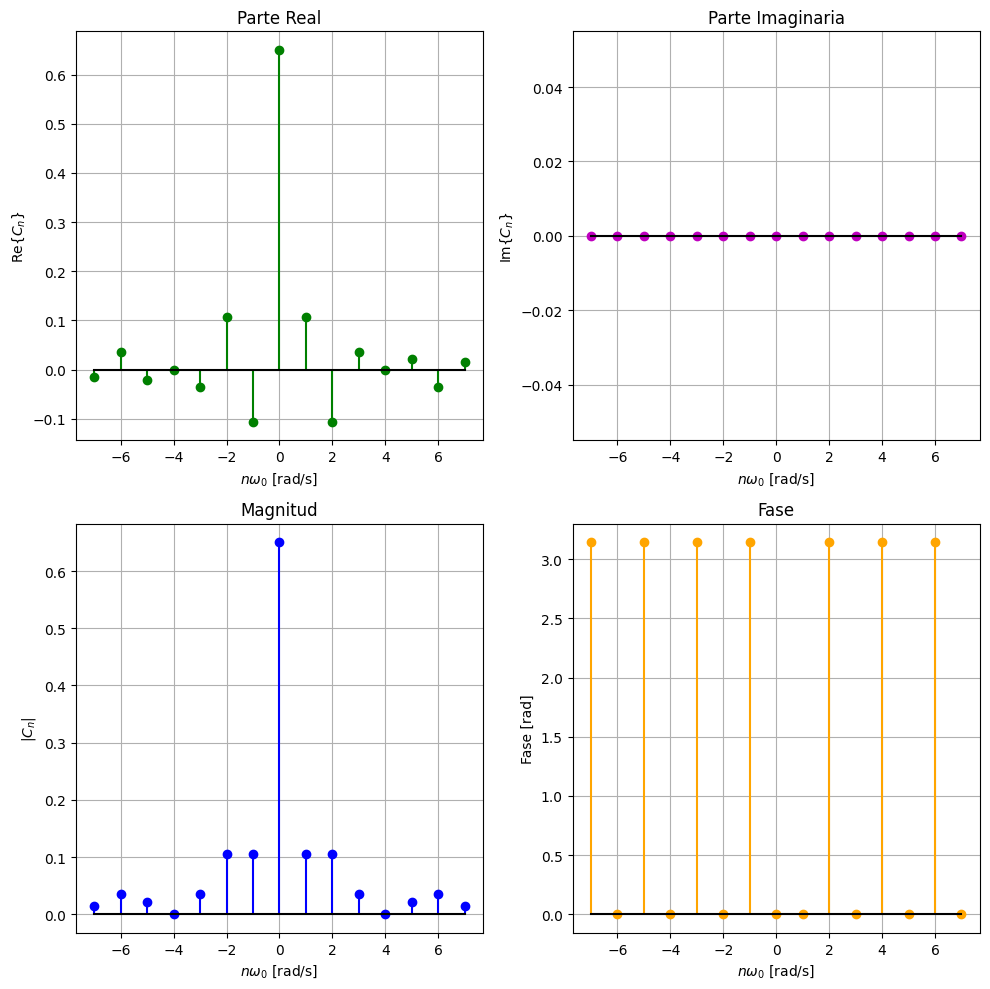

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros nuevos para la señal
N = 7  # Número de armónicos positivos y negativos a considerar (más armónicos que antes)
T = 3  # Nuevo período de la señal en segundos
wo = 2 * np.pi / T  # Frecuencia angular fundamental basada en el nuevo período

# Vector de tiempo para evaluar la señal, con buena resolución (1000 puntos)
Fs = 1000  # Frecuencia de muestreo en Hz (número de puntos)
tv = np.linspace(-T/2, T/2, Fs)  # Vector de tiempo que va desde -T/2 hasta T/2
Nm = len(tv)  # Número total de puntos en el vector de tiempo

# Matriz para almacenar las funciones base exponenciales complejas para cada armónico n
phin = np.zeros((Nm, 2*N+1), np.complex128)

# Calcular la base exponencial para cada armónico desde -N hasta N
for n in range(-N, N+1):
    phin[:, n+N] = np.exp(1j * n * wo * tv)

# Vector con los valores de los armónicos (n) para indexar coeficientes y graficar
nv = np.linspace(-N, N, 2*N+1)

# Cálculo manual de los coeficientes Cn de Fourier para la señal trapezoidal modificada
# La fórmula corresponde a la integral de Fourier aplicada a un trapecio simétrico
# Se ajusta el denominador para que coincida con el nuevo período T
Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi * 2 * nv * 3)

# Ajuste manual de la componente de frecuencia cero (DC), ya que la fórmula no la calcula bien
Cn[N] = 0.65  # Valor medio de la señal (componente DC) ajustado para la nueva señal

# Graficar el espectro de Fourier: partes real, imaginaria, magnitud y fase
fig = plt.figure(figsize=(10,10))

# Parte real de Cn
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'g', basefmt="k-")  # Color verde, base negra
plt.xlabel(r'$n \omega_0$ [rad/s]')
plt.ylabel(r'Re$\{C_n\}$')
plt.title("Parte Real")
plt.grid(True)

# Parte imaginaria de Cn
plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'm', basefmt="k-")  # Color magenta, base negra
plt.xlabel(r'$n \omega_0$ [rad/s]')
plt.ylabel(r'Im$\{C_n\}$')
plt.title("Parte Imaginaria")
plt.grid(True)

# Magnitud de Cn
plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'b', basefmt="k-")  # Color azul, base negra
plt.xlabel(r'$n \omega_0$ [rad/s]')
plt.ylabel(r'$|C_n|$')
plt.title("Magnitud")
plt.grid(True)

# Fase de Cn
plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'orange', basefmt="k-")  # Color naranja, base negra
plt.xlabel(r'$n \omega_0$ [rad/s]')
plt.ylabel('Fase [rad]')
plt.title("Fase")
plt.grid(True)

plt.tight_layout()  # Ajusta los subplots para que no se sobrepongan
plt.show()


Objetivo del código
El objetivo de este código es visualizar y analizar la calidad de la reconstrucción de una señal periódica a partir de un número limitado de armónicos de su serie de Fourier.

Mediante una interfaz interactiva, se permite variar la cantidad de armónicos usados en la reconstrucción y observar:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Nuevo valor de potencia teórica de la señal para ejemplo (puedes cambiarlo)
Px = 0.75  # Potencia de la señal original ajustada

# Función para reconstrucción y graficado con diferentes números de armónicos
def reconstruccion_armonicos(num_armonicos=1):
    # Selección del rango de armónicos centrados en N
    indices = np.arange(N - num_armonicos, N + num_armonicos + 1)

    # Cálculo del error relativo en energía (porcentaje de potencia no representada)
    error_relativo = 1 - np.sum(np.abs(Cn[indices])**2) / Px

    # Reconstrucción de la señal usando suma de armónicos seleccionados
    xe = phin[:, indices].dot(Cn[indices])

    # Gráfica de la señal reconstruida en verde
    plt.plot(tv, xe.real, color='green', label='Señal reconstruida $x_e(t)$', linewidth=2)

    # Señal original en morado para comparación
    plt.plot(tv, x, color='purple', linestyle='--', label='Señal original $x(t)$', linewidth=2)

    # Mostrar el error de reconstrucción en el título
    plt.title(f'Error relativo de energía no representada: {100 * error_relativo:.2f} %', fontsize=14)

    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Prueba interactiva con barra deslizante para número de armónicos
interact(reconstruccion_armonicos, num_armonicos=(1, N, 1))


interactive(children=(IntSlider(value=1, description='num_armonicos', max=7, min=1), Output()), _dom_classes=(…

<function __main__.reconstruccion_armonicos(num_armonicos=1)>

Objetivos del código
Reconstruir una señal periódica a partir de un número variable de armónicos de su serie de Fourier
El código permite aproximar una señal original sumando un número ajustable de componentes armónicas (armónicos positivos y negativos) de su serie de Fourier. Esto muestra cómo la señal se puede representar con diferentes niveles de detalle espectral.